Sprawdzam accuracy dla zaprojektowanej przeze mnie sieci na zbiorze danych Fashion MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

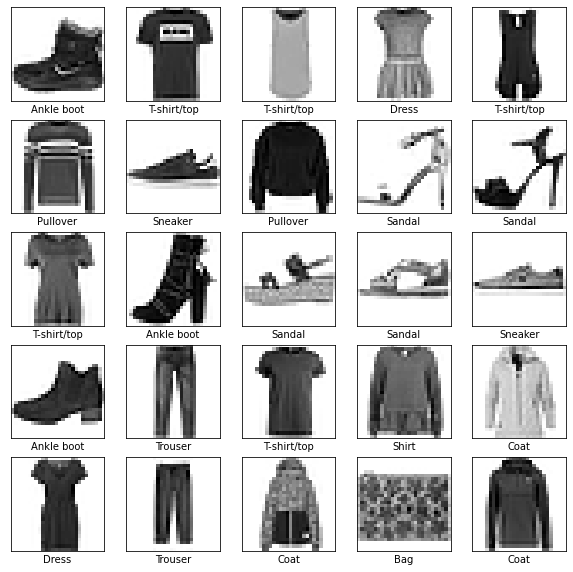

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Zmiana typu danych na float
train_images = train_images / 255.0
test_images = test_images / 255.0



plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

train_labels_categorical = tf.keras.utils.to_categorical(train_labels)
test_labels_categorical = tf.keras.utils.to_categorical(test_labels)


train_images_tensor = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_tensor = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(32, (5, 5), kernel_initializer='he_uniform', padding='valid', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(Activation('elu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(Activation('softsign'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(256)) 
model.add(Activation('selu'))
model.add(Dropout(0.75)) 
model.add(Dense(10))
model.add(Activation('softmax')) 

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
activation_20 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
activation_21 (Activation)   (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 128)        

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=False,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format="channels_last",
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

In [ ]:
datagen.fit(train_images_tensor)


# Early stopping i system checkpointów

checkpoint_path = '/content/gdrive/My Drive/Colab Notebooks/MNIST-checkpoint{epoch:02d}-{val_accuracy:.2f}.hdf5'

# patience - ile epok może maksymalnie upłynąć, zanim model zadecyduje, że trend sprawdzanej metryki nie jest zgodny z założonym
# np. dla tego przypadku jest to 30 epok, monitorowana jest wielkość "validation loss" i warunkiem jest minimalizacja
# jeśli loss zacznie rosnąć, to jeśli w ciągu tych 30 epok trend się nie odwróci, to uczenie zostanie zatrzymane

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=False, mode='min')
]


# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(train_images_tensor,
         train_labels_categorical),
                        epochs=25,
                        verbose=1,
                        validation_data=(test_images_tensor, test_labels_categorical),
                        workers=4, callbacks=keras_callbacks)


Epoch 1/25
1875/1875 [==============================] - 108s 57ms/step - loss: 1.1551 - accuracy: 0.5906 - val_loss: 0.6477 - val_accuracy: 0.7678
Epoch 2/25
1875/1875 [==============================] - 110s 59ms/step - loss: 0.7893 - accuracy: 0.7147 - val_loss: 0.5683 - val_accuracy: 0.7964
Epoch 3/25
1875/1875 [==============================] - 109s 58ms/step - loss: 0.6897 - accuracy: 0.7487 - val_loss: 0.5128 - val_accuracy: 0.8157
Epoch 4/25
1875/1875 [==============================] - 110s 59ms/step - loss: 0.6372 - accuracy: 0.7673 - val_loss: 0.4927 - val_accuracy: 0.8213
Epoch 5/25
1875/1875 [==============================] - 110s 59ms/step - loss: 0.5994 - accuracy: 0.7832 - val_loss: 0.4691 - val_accuracy: 0.8296
Epoch 6/25
1875/1875 [==============================] - 111s 59ms/step - loss: 0.5700 - accuracy: 0.7926 - val_loss: 0.4512 - val_accuracy: 0.8365
Epoch 7/25
1875/1875 [==============================] - 113s 60ms/step - loss: 0.5529 - accuracy: 0.7997 - val_loss: 0

In [ ]:
pip install talos

     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 5.4MB 10.2MB/s 
     |████████████████████████████████| 9.5MB 41.7MB/s 
     |████████████████████████████████| 2.6MB 29.6MB/s 
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41610 sha256=3a2dd99f583a63db65a91df9712c4632b688515c5c7b3c26d80e692ad09650ab
  Stored in directory: /root/.cache/pip/wheels/75/33/46/c871b94249bd57d17797d049b3dff8e3a09c315afb67eb14c6
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=7faeba0b6dd8b2735ed7827e5a897a8bc0ff24df17ed28e5fd7d1bd5a0fc336a
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-cp36-none-any.whl size=3603 sha256=4a0805cfe8369fdeb1e893621cb57c2d2aff41689d0069730e0d180e17ea4955
  Stored in directory: /root/.cache/pip/wheels/9d/d3/8c/9503a22b0a38e8b21c70ad834e4606d209193443

In [ ]:
import talos as ta

In [ ]:
p = {'activation':['relu', 'elu'],
     'padding': ['same'], #valid = no padding, same padding = zero padding
      'optimizer': ['Adam', 'rmsprop'],
      'losses': ['categorical_crossentropy'],
      'dense_neurons': [16, 256],
      'batch_size': [0,34],
      'epochs': [2]}


def fashion_MNIST_talos(x_train, y_train, x_val, y_val, params):
  
  model = tf.keras.Sequential()

  model.add(Conv2D(32, (5, 5), kernel_initializer='he_uniform', padding=params['padding'], input_shape=(28,28, 1)))
  model.add(Activation(params['activation']))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding=params['padding']))
  model.add(Activation(params['activation']))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding=params['padding']))
  model.add(Activation(params['activation']))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25)) 

  model.add(Flatten())
  model.add(Dense(params['dense_neurons'])) 
  model.add(Activation(params['activation']))
  model.add(Dropout(0.75)) 
  model.add(Dense(10))
  model.add(Activation('softmax')) 

  model.compile(loss=params['losses'],
                optimizer=params['optimizer'],
                metrics=['accuracy'])

  datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.05,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.05,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=False,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format="channels_last",
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
  
  datagen.fit(x_train)

  checkpoint_path = '/content/gdrive/My Drive/Colab Notebooks/checkpoint{epoch:02d}-{val_accuracy:.2f}.hdf5'

  keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=False, mode='min')
  ]

  out = model.fit(datagen.flow(x_train, y_train),
                        epochs=params['epochs'],
                        verbose=1,
                        validation_data=(x_val, y_val),
                        batch_size = params['batch_size'],
                        workers=4, 
                        callbacks=keras_callbacks)

  return out, model

In [ ]:
scan_object = ta.Scan(x=train_images_tensor,
              y=train_labels_categorical,
              params=p, model=fashion_MNIST_talos,
              experiment_name='Fashion_MNIST_talos',
              x_val=test_images_tensor, y_val=test_labels_categorical)



  0%|          | 0/16 [00:00<?, ?it/s]

Epoch 1/2
1875/1875 [==============================] - 126s 67ms/step - loss: 2.1442 - accuracy: 0.1496 - val_loss: 1.5949 - val_accuracy: 0.5639
Epoch 2/2
1875/1875 [==============================] - 121s 64ms/step - loss: 1.8749 - accuracy: 0.2341 - val_loss: 1.0274 - val_accuracy: 0.6684




  6%|▋         | 1/16 [04:08<1:02:03, 248.24s/it]

Epoch 1/2
1875/1875 [==============================] - 124s 66ms/step - loss: 1.7840 - accuracy: 0.2895 - val_loss: 0.8145 - val_accuracy: 0.7159
Epoch 2/2
1875/1875 [==============================] - 121s 65ms/step - loss: 1.4681 - accuracy: 0.4061 - val_loss: 0.7177 - val_accuracy: 0.7402




 12%|█▎        | 2/16 [08:15<57:51, 247.95s/it]  

Epoch 1/2
1875/1875 [==============================] - 128s 68ms/step - loss: 0.7926 - accuracy: 0.7085 - val_loss: 0.4710 - val_accuracy: 0.8231
Epoch 2/2
1875/1875 [==============================] - 126s 67ms/step - loss: 0.5267 - accuracy: 0.8075 - val_loss: 0.3828 - val_accuracy: 0.8641




 19%|█▉        | 3/16 [12:30<54:11, 250.13s/it]

Epoch 1/2
1875/1875 [==============================] - 131s 70ms/step - loss: 0.7464 - accuracy: 0.7319 - val_loss: 0.5836 - val_accuracy: 0.8245
Epoch 2/2
1875/1875 [==============================] - 128s 68ms/step - loss: 0.5609 - accuracy: 0.8045 - val_loss: 0.4728 - val_accuracy: 0.8446




 25%|██▌       | 4/16 [16:50<50:37, 253.15s/it]

Epoch 1/2
1875/1875 [==============================] - 123s 65ms/step - loss: 2.1151 - accuracy: 0.1634 - val_loss: 1.3110 - val_accuracy: 0.6175
Epoch 2/2
1875/1875 [==============================] - 122s 65ms/step - loss: 1.8718 - accuracy: 0.2336 - val_loss: 1.0202 - val_accuracy: 0.7218




 31%|███▏      | 5/16 [20:57<46:01, 251.04s/it]

Epoch 1/2
1875/1875 [==============================] - 124s 66ms/step - loss: 1.8593 - accuracy: 0.2802 - val_loss: 0.9786 - val_accuracy: 0.7271
Epoch 2/2
1875/1875 [==============================] - 123s 65ms/step - loss: 1.5083 - accuracy: 0.4138 - val_loss: 0.8380 - val_accuracy: 0.7590




 38%|███▊      | 6/16 [25:04<41:40, 250.01s/it]

Epoch 1/2
1875/1875 [==============================] - 128s 68ms/step - loss: 0.7957 - accuracy: 0.7077 - val_loss: 0.4662 - val_accuracy: 0.8208
Epoch 2/2
1875/1875 [==============================] - 127s 67ms/step - loss: 0.5299 - accuracy: 0.8074 - val_loss: 0.3843 - val_accuracy: 0.8600




 44%|████▍     | 7/16 [29:20<37:45, 251.70s/it]

Epoch 1/2
1875/1875 [==============================] - 130s 69ms/step - loss: 0.7546 - accuracy: 0.7274 - val_loss: 0.5277 - val_accuracy: 0.8178
Epoch 2/2
1875/1875 [==============================] - 130s 69ms/step - loss: 0.5714 - accuracy: 0.7993 - val_loss: 0.5012 - val_accuracy: 0.8382




 50%|█████     | 8/16 [33:41<33:55, 254.50s/it]

Epoch 1/2
1875/1875 [==============================] - 135s 72ms/step - loss: 1.3175 - accuracy: 0.5061 - val_loss: 0.5531 - val_accuracy: 0.8057
Epoch 2/2
1875/1875 [==============================] - 134s 72ms/step - loss: 1.0590 - accuracy: 0.5795 - val_loss: 0.5151 - val_accuracy: 0.8170




 56%|█████▋    | 9/16 [38:11<30:14, 259.26s/it]

Epoch 1/2
1875/1875 [==============================] - 135s 72ms/step - loss: 1.3122 - accuracy: 0.5080 - val_loss: 0.5842 - val_accuracy: 0.7941
Epoch 2/2
1875/1875 [==============================] - 135s 72ms/step - loss: 1.0568 - accuracy: 0.5860 - val_loss: 0.5294 - val_accuracy: 0.8043




 62%|██████▎   | 10/16 [42:42<26:15, 262.66s/it]

Epoch 1/2
1875/1875 [==============================] - 139s 74ms/step - loss: 0.7340 - accuracy: 0.7429 - val_loss: 0.4374 - val_accuracy: 0.8417
Epoch 2/2
1875/1875 [==============================] - 138s 74ms/step - loss: 0.5318 - accuracy: 0.8099 - val_loss: 0.3779 - val_accuracy: 0.8651




 69%|██████▉   | 11/16 [47:20<22:16, 267.31s/it]

Epoch 1/2
1875/1875 [==============================] - 141s 75ms/step - loss: 0.7671 - accuracy: 0.7384 - val_loss: 0.4466 - val_accuracy: 0.8351
Epoch 2/2
1875/1875 [==============================] - 152s 81ms/step - loss: 0.5510 - accuracy: 0.8086 - val_loss: 0.4164 - val_accuracy: 0.8575




 75%|███████▌  | 12/16 [52:15<18:22, 275.57s/it]

Epoch 1/2
1875/1875 [==============================] - 143s 76ms/step - loss: 1.3619 - accuracy: 0.4996 - val_loss: 0.5793 - val_accuracy: 0.7947
Epoch 2/2
1875/1875 [==============================] - 137s 73ms/step - loss: 1.0671 - accuracy: 0.5795 - val_loss: 0.5279 - val_accuracy: 0.8059




 81%|████████▏ | 13/16 [56:56<13:51, 277.29s/it]

Epoch 1/2
1875/1875 [==============================] - 136s 73ms/step - loss: 1.2845 - accuracy: 0.5192 - val_loss: 0.5783 - val_accuracy: 0.7911
Epoch 2/2
1875/1875 [==============================] - 145s 77ms/step - loss: 1.0652 - accuracy: 0.5836 - val_loss: 0.5334 - val_accuracy: 0.8023




 88%|████████▊ | 14/16 [1:01:39<09:17, 278.98s/it]

Epoch 1/2
1875/1875 [==============================] - 141s 75ms/step - loss: 0.7443 - accuracy: 0.7389 - val_loss: 0.4278 - val_accuracy: 0.8434
Epoch 2/2
1875/1875 [==============================] - 141s 75ms/step - loss: 0.5359 - accuracy: 0.8081 - val_loss: 0.4196 - val_accuracy: 0.8412




 94%|█████████▍| 15/16 [1:06:23<04:40, 280.36s/it]

Epoch 1/2
1670/1875 [=========================>....] - ETA: 15s - loss: 0.7995 - accuracy: 0.7305Buffered data was truncated after reaching the output size limit.

In [ ]:
scan_object.details

experiment_name        Fashion_MNIST_talos
random_method             uniform_mersenne
reduction_method                      None
reduction_interval                      50
reduction_window                        20
reduction_threshold                    0.2
reduction_metric                   val_acc
complete_time               12/07/20/00:54
x_shape                 (60000, 28, 28, 1)
y_shape                        (60000, 10)
dtype: object

In [ ]:
analyze_object = ta.Analyze(scan_object)
analyze_object.data

,start,end,duration,round_epochs,loss,accuracy,val_loss,val_accuracy,activation,batch_size,dense_neurons,epochs,losses,optimizer,padding
0,12/06/20-234300,12/06/20-234708,248.056824,2,1.874866,0.234117,1.027361,0.6684,relu,0,16,2,categorical_crossentropy,Adam,same
1,12/06/20-234708,12/06/20-235115,247.105374,2,1.468078,0.406133,0.717683,0.7402,relu,0,16,2,categorical_crossentropy,rmsprop,same
2,12/06/20-235115,12/06/20-235530,255.027161,2,0.526697,0.807467,0.382832,0.8641,relu,0,256,2,categorical_crossentropy,Adam,same
3,12/06/20-235531,12/06/20-235951,260.003687,2,0.560924,0.804533,0.472846,0.8446,relu,0,256,2,categorical_crossentropy,rmsprop,same
4,12/06/20-235951,12/07/20-000357,245.926708,2,1.871757,0.233633,1.020156,0.7218,relu,34,16,2,categorical_crossentropy,Adam,same
5,12/07/20-000357,12/07/20-000804,247.420708,2,1.508267,0.413817,0.837998,0.7590,relu,34,16,2,categorical_crossentropy,rmsprop,same
6,12/07/20-000805,12/07/20-001220,255.468338,2,0.529919,0.807450,0.384347,0.8600,relu,34,256,2,categorical_crossentropy,Adam,same
7,12/07/20-001220,12/07/20-001641,260.841548,2,0.571381,0.799317,0.501245,0.8382,relu,34,256,2,categorical_crossentropy,rmsprop,same
8,12/07/20-001641,12/07/20-002111,270.198809,2,1.058983,0.579450,0.515055,0.8170,elu,0,16,2,categorical_crossentropy,Adam,same
9,12/07/20-002112,12/07/20-002542,270.411681,2,1.056751,0.586017,0.529371,0.8043,elu,0,16,2,categorical_crossentropy,rmsprop,same


In [ ]:
analyze_object.high('val_accuracy')

0.8651000261306763

In [ ]:
analyze_object.rounds2high('val_accuracy')

10

Sprawdzenie  accuracy po 25 epokach z zastosowaniem znalezionych przez algorytm optymalnych hiperparametrów

In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(32, (5, 5), kernel_initializer='he_uniform', padding='same', input_shape=(28,28, 1)))
model.add(Activation('elu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(Activation('elu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(Activation('elu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('elu'))
model.add(Dropout(0.75)) 
model.add(Dense(10))
model.add(Activation('softmax')) 

model.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.05,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.05,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=False,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format="channels_last",
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
  
datagen.fit(train_images_tensor)

checkpoint_path = '/content/gdrive/My Drive/Colab Notebooks/checkpoint{epoch:02d}-{val_accuracy:.2f}.hdf5'

keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=False, mode='min')
  ]

history = model.fit(datagen.flow(train_images_tensor, train_labels_categorical),
                        epochs=25,
                        verbose=1,
                        validation_data=(test_images_tensor, test_labels_categorical),
                        batch_size = 0,
                        workers=4, 
                        callbacks=keras_callbacks)

Epoch 1/25
1875/1875 [==============================] - 140s 75ms/step - loss: 0.7673 - accuracy: 0.7310 - val_loss: 0.4548 - val_accuracy: 0.8345
Epoch 2/25
1875/1875 [==============================] - 140s 75ms/step - loss: 0.5377 - accuracy: 0.8081 - val_loss: 0.3825 - val_accuracy: 0.8633
Epoch 3/25
1875/1875 [==============================] - 138s 74ms/step - loss: 0.5068 - accuracy: 0.8187 - val_loss: 0.3627 - val_accuracy: 0.8689
Epoch 4/25
1875/1875 [==============================] - 138s 74ms/step - loss: 0.4823 - accuracy: 0.8307 - val_loss: 0.3981 - val_accuracy: 0.8528
Epoch 5/25
1875/1875 [==============================] - 138s 74ms/step - loss: 0.4726 - accuracy: 0.8313 - val_loss: 0.4086 - val_accuracy: 0.8588
Epoch 6/25
1875/1875 [==============================] - 141s 75ms/step - loss: 0.4639 - accuracy: 0.8359 - val_loss: 0.3482 - val_accuracy: 0.8721
Epoch 7/25
1875/1875 [==============================] - 138s 74ms/step - loss: 0.4585 - accuracy: 0.8378 - val_loss: 0

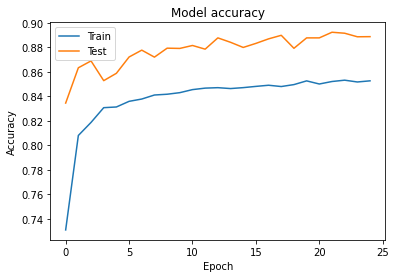

In [48]:
#Wizualizacja historii uczenia

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Wniosek: Uzyskono poprawę o około 1 punkt procentowy względem modelu z hiperparametrami wyjściowymi.